In [1]:
import random
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
def generate_the_data_series(start, end, length=750):
    anomaly_score_list_  = [0] * length
    mid = (start + end) // 2 - np.random.randint(-15, 15)
    print(mid)
    sig = math.sqrt(0.2)
    x = np.linspace(mid - 3*sig, mid + 3*sig, length)
    y_sig = np.exp(-(x - mid) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig)
    
    
    anomaly_score_list_ = np.zeros(length)
    diff = 375 - mid
    print(diff)
#     anomaly_score_list_ = y_sig
    if diff > 0:
        anomaly_score_list_[:length - diff] = y_sig[diff:]
        for i in range(length-diff):
            anomaly_score_list_[i] = anomaly_score_list_[i-1] + np.random.uniform(-0.05, 0.05)
    else:
        anomaly_score_list_[-diff:] = y_sig[:length+diff]
        for i in range(diff):
            anomaly_score_list_[diff-i] = anomaly_score_list_[diff-i+1] + np.random.uniform(-0.05, 0.05)
    
            if i in range(start-20, end+20):
                if anomaly_score_list_[i] <= 0.7:
                    anomaly_score_list_[i] = np.random.uniform(0.7, 0.9)
            
    for i in range(length):
        if anomaly_score_list_[i] < 0.2:
            anomaly_score_list_[i] = anomaly_score_list_[i-1] + np.random.uniform(-0.05, 0.05)
            if anomaly_score_list_[i] <= 0:
                anomaly_score_list_[i] = np.random.uniform(0, 0.2)
            if anomaly_score_list_[i] >= 0.45:
                 anomaly_score_list_[i] = anomaly_score_list_[i-1] + np.random.uniform(-0.1, 0.05)
    # 基本值
    level_1 = np.random.uniform(0.1, 0.3)
    level_2 = np.random.uniform(0.6, 0.9)
    level_3 = np.random.uniform(0.1, 0.3)
    for i in range(length):
        if i < start:
            anomaly_score_list_[i] += np.random.uniform(level_1, level_1+0.05)
        elif i > end:
            anomaly_score_list_[i] += np.random.uniform(level_3, level_3+0.05)
        else:
            anomaly_score_list_[i] += np.random.uniform(min(level_1, level_3), max(level_1, level_3))
#     加入噪声
    for i in range(length):
        anomaly_score_list_[i] += np.random.uniform(-0.05, 0.05)
    
#     每5帧出现一个异常值
    for i in range(length):
        if i % 5 == 0: 
            if i < start or i > end:
                anomaly_score_list_[i] += np.random.uniform(0, 0.1)
            else:
                anomaly_score_list_[i] += np.random.uniform(0, 0.2)
    
    for i in range(length):
        anomaly_score_list_[i] *= random.choice([0.9, 1, 1.05])
            
#     tmp = np.random.uniform(0.4, 0.6)
#     for i in range(start, end):
#         anomaly_score_list_[i] += tmp
    
    # 过滤掉大于 1 的值
    p_1 = anomaly_score_list_[start-21]
    r_1 = (anomaly_score_list_.max() - p_1) / (mid - start + 20)
    p_2 = anomaly_score_list_[end-21]
    r_2 = (anomaly_score_list_.max() - p_2) / (end - mid + 20)
    for i in range(length):
#         if i in range(start-20, mid):
#             if anomaly_score_list_[i] < p_1:
#                 anomaly_score_list_[i] = r_1 * (mid - i) + p_1 + np.random.uniform(-0.05, 0.05)
#         if i in range(mid, end + 20):
#             if anomaly_score_list_[i] < p_2:
#                 anomaly_score_list_[i] = r_2 * (i - mid) + p_2 + np.random.uniform(-0.05, 0.05)
        if anomaly_score_list_[i] >= 1:
            anomaly_score_list_[i] = np.random.uniform(0.7, 0.95)
         
    fig = plt.figure()
    plt.title("异常得分", fontdict={'fontsize': 20})
    plt.plot(np.arange(0, length), anomaly_score_list_, c='b')
#     plt.plot(np.arange(start - 20, end+20), anomaly_score_list_[start-20: end+20], c='r')
    plt.show()
    
    return anomaly_score_list_

460
-85


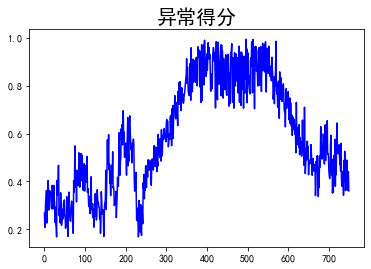

In [15]:
df = generate_the_data_series(130, 150, 750)

In [7]:
def generate_aimation(idx, video_name, anomaly_score_list_, start, end):
    fig = plt.figure()
    plt.title("异常得分", fontdict={'fontsize': 20})
    ims = []
    for i in range(len(anomaly_score_list_)):
        plt.yticks(np.arange(0, 1.1, 0.1))
        frame = []
        if i <= start:
            frame += plt.plot(np.arange(i), anomaly_score_list_[:i], c='b')
        
        elif i > start and i < end:
            stop = i if i < end else end
            frame += plt.plot(np.arange(start+1), anomaly_score_list_[:start+1], c='b')
            frame += plt.plot(np.arange(start, stop), anomaly_score_list_[start:stop], c='r')
        else:
            frame += plt.plot(np.arange(start+1), anomaly_score_list_[:start+1], c='b')
            frame += plt.plot(np.arange(end-1, i), anomaly_score_list_[end-1:i], c='b')
            frame += plt.plot(np.arange(start, end), anomaly_score_list_[start:end], c='r')
        ims.append(frame)
    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    ani.save(str(idx) + f"new_score_{video_name}.gif",writer='pillow')

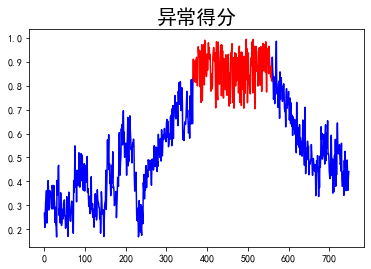

In [18]:
for i in range(340, 365):
    df[i] = df[i] - np.random.uniform(0.1, 0.2)
generate_aimation(32, '2021-04-29_20-32-21_103', df, 365, 560)

In [19]:
df = np.array(new_df)
np.savetxt('003.txt', df)

In [20]:
df_str = '0.14350083  0.12945447  0.04565376  0.09743924  0.13967681  0.1456707 0.10485411  0.13193882  0.15413471  0.16882539  0.18809312  0.17320283 0.29162834  0.27833789  0.18933029  0.26239619  0.29541063  0.26597752 0.14643781  0.19680822  0.07155061  0.14360526  0.12432019  0.18252827 0.19007323  0.27094123  0.27380821  0.25176201  0.23580893  0.31157126 0.44039611  0.37046422  0.3246858   0.2887088   0.29235687  0.42964779 0.28236163  0.37725124  0.32649548  0.32993897  0.229836    0.20972285 0.24727567  0.24007787  0.20476433  0.32937596  0.18792691  0.16221986 0.2185624   0.14177687  0.25713207  0.21315146  0.25164936  0.21965411 0.16954859  0.1868204   0.16904349  0.07379191  0.1457028   0.12935359 0.20607751  0.1321142   0.25811187  0.25217743  0.18282722  0.20370141 0.13294789  0.14244036  0.10545129  0.19081939  0.15381966  0.25007839 0.1983276   0.21592597  0.25234417  0.28487542  0.42122371  0.36508769 0.37293355  0.34958356  0.35013241  0.31385534  0.35740656  0.34390101 0.23558786  0.23032906  0.22779363  0.24803169  0.13935883  0.14654047 0.17365665  0.14540791  0.12076707  0.1699568   0.12912239  0.09133544 0.13068731  0.03409571 -0.01257293  0.00410453  0.58916328  0.77082187 0.70902535  0.69547048  0.68555206  0.8445397   0.72796699  0.73399471 0.67504977  0.74717248  0.94359947  0.71900803  0.80270978  0.76894763 0.69525299  0.76228512  0.82018315  0.83249102  0.87330925  0.95535869 0.91402906  0.84496416  0.85728034  0.88340454  0.90437152  0.81096106 0.80288871  0.80326387  0.89978838  0.8718444   0.87256462  0.87884384 0.87355417  0.86889931  0.84906208  0.94896546  0.78435272  0.83337663 0.90982044  0.88015465  0.90152666  0.85256107  0.91612074  0.91473085 0.90895159  0.92440177  0.94247284  0.96206011  0.95991199  0.96593046 0.86861969  0.87938436  0.85612151  0.96596932  0.87537607  0.98279691 0.97567692  0.91299536  0.90444501  0.95588447  0.89647765  0.83371248 0.87727952  0.93071374  0.84879284  0.87542023  0.85217395  0.80121969 0.88253123  0.84673086  0.89320644  0.86073705  0.86720611  0.86396935 0.94574135  0.73690396  0.88088067  0.85817809  0.85419668  0.76153936 0.79959288  0.83318319  0.8112102   0.75478876  0.77957601  0.76641021 0.62665073  0.67203321  0.65494882  0.64830635  0.71230036  0.62591707 0.58638347  0.57920048  0.57563151  0.58589189  0.56232384  0.60826824 0.54982508  0.56930517  0.16383878  0.05434539  0.07110546  0.05584328 0.10339036  0.08397833  0.11333338  0.10766036  0.20946269  0.2346163 0.25911797  0.19213302  0.26284669  0.3518236   0.28205553  0.37370694 0.38531016  0.26950193  0.26419201  0.23603016  0.34373567  0.22457311 0.24405533  0.22730705  0.23350937  0.24350389  0.26878689  0.18383864 0.23368452  0.18690157  0.25879757  0.18494924  0.2582868   0.2109891 0.15808362  0.20033641  0.26436995  0.22506556  0.28766421  0.22386555 0.28050218  0.16136708  0.20760319  0.22602357  0.21513016  0.18069793 0.21256204  0.20628457  0.22072216  0.17182062  0.1985987   0.19233697 0.21704238  0.18767019  0.1547708   0.21204866  0.15066416  0.17634865 0.20509934  0.18867652  0.30608994  0.28557719  0.2370051   0.2366307 0.22316136  0.29904574  0.32980896  0.18913658  0.17649595  0.15677205 0.25706662  0.20778126  0.13474215  0.11209864  0.12618676  0.09479888 0.03305445  0.08548133 -0.00989596 -0.01718848  0.16560254  0.07020602 0.14999926  0.2253868   0.18831186  0.34104066  0.27950538  0.32719891 0.31199261  0.29464108  0.36530422  0.30294019  0.29844989  0.33549002 0.39648208  0.3376008   0.22405864  0.28594143  0.27763015  0.20301014 0.27203823  0.11230361  0.16086266  0.03987881  0.1001315   0.09034099 0.01323457  0.05690702  0.12720902  0.07695866  0.19774641  0.0901987 0.12463403  0.18404133  0.2186283   0.15675246  0.2595382   0.26711581 0.23084413  0.35239529  0.37775481  0.26819219  0.29181224  0.26269797 0.3218702   0.33595071  0.30668829  0.33940697  0.33871411  0.28645754 0.4406243   0.3022651   0.40332593  0.38745957  0.3474905   0.34370924 0.2505485   0.25868075  0.21479475  0.20299047  0.21128046  0.166194 0.22883629  0.22538282  0.26454066  0.33441828  0.38593914  0.35006434 0.37570812  0.33543528  0.3403589   0.27268481  0.25624304  0.39090656 0.31419179  0.36783694  0.2749019   0.28458432  0.23409303  0.25066549 0.19198862  0.18972222  0.186017    0.16786104  0.13325523  0.18453956 0.14227327  0.15438474  0.15684114  0.11868596  0.19261797  0.11137008 0.12320864  0.06350462  0.11624018  0.17573657  0.17390021  0.1139545 0.06575485  0.15670282  0.12172287  0.09674863  0.06508903  0.12731896 0.11889461  0.14103846  0.15054499  0.04810623  0.11310219  0.06230396 0.18243166  0.11128004  0.08949189  0.15128293  0.06514733  0.13108581 0.13894206  0.09457565  0.14924921  0.12554832  0.18146935  0.0714704 0.08762489  0.04802956  0.12582523  0.16783796  0.04176472  0.07263065 0.04613461 -0.01592959  0.13923704  0.03031309  0.00857439  0.14977124 0.07498255  0.17249617  0.18977663  0.12049457  0.14364468  0.09867946 0.26981635  0.20477705  0.24014699  0.19172484  0.20378839  0.26084201 0.1296709   0.1407461   0.17040515  0.11720912  0.17547517  0.16570084 0.1417758   0.13165728  0.19764494  0.25358757  0.08770399  0.09906699 0.07422673  0.16691564  0.22353669  0.19234787  0.23007907  0.1561745 0.17902065  0.14688423  0.15736701  0.10062069  0.22283247  0.13275288 0.22448333  0.15782017  0.26206212  0.32918634  0.2917577   0.33860677 0.39484298  0.30403835  0.29136802  0.31077502  0.30990012  0.26304026 0.26639836  0.27339533  0.26621616  0.27773292  0.25770832  0.1862887 0.19927573  0.28601452  0.23658255  0.19361237  0.26798427  0.32066092 0.29657701  0.39626927  0.2728534   0.15347222  0.24900085  0.20326163 0.23756382  0.20959175  0.27424262  0.25228501  0.22851166  0.36031676 0.37597924  0.38679225  0.32732474  0.37623078  0.56110343  0.39295813 0.43949859  0.39624095  0.33916998  0.44677141  0.39329882  0.40280636 0.30163127  0.36532786  0.30810659  0.29179091  0.38847558  0.32451931 0.42370549  0.50184169  0.38687608  0.35886337  0.27788713  0.38985066 0.32770567  0.16937486  0.22483055  0.15791046  0.28619698  0.27544531 0.21952758  0.26565899  0.28513681  0.29169954  0.18156478  0.1626041 0.13221981  0.12048043  0.21528206  0.15654594  0.1609644   0.1976793 0.16441948  0.12020048  0.11403864  0.05410759  0.10633871  0.08623728 0.04739532  0.1370115   0.08370147  0.11139598  0.04846302  0.13011069 0.06767746  0.09693609  0.12159177  0.01123655  0.03630147  0.02618289 0.16744782  0.09079453  0.13045846  0.03623743  0.08172374  0.07658017 0.08292235  0.10137112  0.11462937  0.0732679   0.11515001  0.07276751 0.16915835  0.18938983  0.18380062  0.17226708  0.16229245  0.15116296 0.10536787  0.2629523   0.18662391  0.09907463  0.12289016  0.20041239 0.30244917  0.23354854  0.24482726  0.30428756  0.36236411  0.36038961 0.39803249  0.36899644  0.40737411  0.41822019  0.4845389   0.37036433 0.36338984  0.33791214  0.36432287  0.45457089  0.40579716  0.45421474 0.42435317  0.37562606  0.39355944  0.31743417  0.39122111  0.36709224 0.3857683   0.40536601  0.33139185  0.42811525  0.39722246  0.46161515 0.39771949  0.44409756  0.40381546  0.42987733  0.42775202  0.38423068 0.44517753  0.45343651  0.31522314  0.35376539  0.42173919  0.45519372 0.43383811  0.36343865  0.43777072  0.34235052  0.36562697  0.34202045 0.29235652  0.29495646  0.27342568  0.25778165  0.22405929  0.27835157 0.26311581  0.33667039  0.27674811  0.34463125  0.37289149  0.26962119 0.3810517   0.35494346  0.34486337  0.30151275  0.35499016  0.38776663 0.28950855  0.43322077  0.33234383  0.33366361  0.32992856  0.31234242 0.29843238  0.29717747  0.24140635  0.29395777  0.24308412  0.29374522 0.22206527  0.25288061  0.27162716  0.33204767  0.33150941  0.35617902 0.31613148  0.46449114  0.4013007   0.31988027  0.27482977  0.3473791 0.34787439  0.29130673  0.31673801  0.38271623  0.42049048  0.40758283 0.38909252  0.36989781  0.41394267  0.28807369  0.4633443   0.38374656 0.44815554  0.40169566  0.39827294  0.4069521   0.34469348  0.35546344 0.33531487  0.38910025  0.32408703  0.33312542  0.39095849  0.31607192 0.42295719  0.41761414  0.37493476  0.30182189  0.40315655  0.378345 0.46612134  0.31175325  0.43754961  0.46267139  0.41582896  0.35269386 0.32454375  0.35001418  0.4249198   0.3486263   0.44118606  0.31865605 0.36064798  0.36017816  0.34430485  0.43201521  0.39827702  0.38156279 0.41837713  0.31227659  0.53127635  0.43711344  0.35773425  0.38806652 0.38630499  0.47751969  0.37186678  0.42826833  0.39801361  0.36379846 0.45707677  0.35907018  0.44234419  0.33895371  0.46884433  0.48844908 0.325614    0.40912697  0.40559728  0.30030213  0.40684326  0.35591834 0.4238693   0.32392674  0.38810486  0.43318585  0.3686221   0.37348021 0.37816502  0.41796148  0.39043245  0.29226581  0.35414084  0.3200946 0.30011975  0.3469473   0.44189413  0.33826237  0.33715737  0.34643702'

In [26]:
df = []
for it in df_str.split(' '):
    if it != '':
        df.append(float(it))

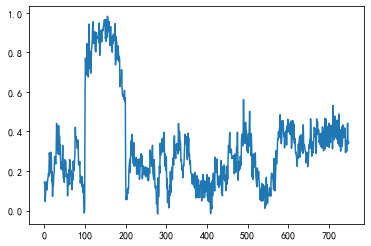

In [28]:
plt.plot(df)

In [29]:
new_df = [0] * 750

In [44]:
new_df[0:90] = df[0:90]
for i in range(90,115):
    new_df[i] = new_df[i-1] + np.random.uniform(-0.05,0.05)
new_df[115:200] = df[100:195]
new_df[200:] = df[200:]

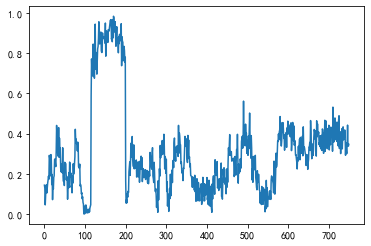

In [45]:
for i in range(750):
    if new_df[i] <= 0:
        new_df[i] = np.random.uniform(0, 0.05)
plt.plot(new_df)

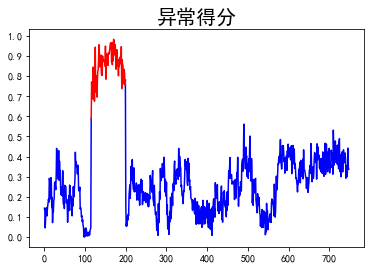

In [46]:
generate_aimation(32, '2021-04-29_20-32-21_003', new_df, 115, 200)